# Chapter 8 - Tree-based Methods

- [8.1.1 Regression Trees](#8.1.1-Regression-Trees)
  - [Figure 8.2: The three-region partitions](#Figure-8.2:-The-three-region-partitions)
  - [Pruning](#Pruning)
- [8.1.2 Classification Trees](#8.1.2-Classification-Trees)
- [8.3 Lab: Decision Trees](#8.3-Lab:-Decision-Trees)
  - [Lab: 8.3.1 Fitting Classification Trees](#8.3.1-Fitting-Classification-Trees)
  - [Lab: 8.3.2 Fitting Regression Trees](#8.3.2-Fitting-Regression-Trees)
  - [Lab: 8.3.3 Bagging and Random Forests](#8.3.3-Bagging-and-Random-Forests)
  - [Lab: 8.3.4 Boosting](#8.3.4-Boosting)

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-white')

/home/sameperson/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


---
### 8.1.1 Regression Trees

In [2]:
# Load data
df = pd.read_csv('Data/Hitters.csv').dropna()
df.head(3)

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
1    -Alan Ashby    315    81      7    24   38     39     14    3449    835   
2   -Alvin Davis    479   130     18    66   72     76      3    1624    457   
3  -Andre Dawson    496   141     20    65   78     37     11    5628   1575   

     ...      CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
1    ...        321   414     375       N        W     632       43      10   
2    ...        224   266     263       A        W     880       82      14   
3    ...        828   838     354       N        E     200       11       3   

   Salary  NewLeague  
1   475.0          N  
2   480.0          A  
3   500.0          N  

[3 rows x 21 columns]

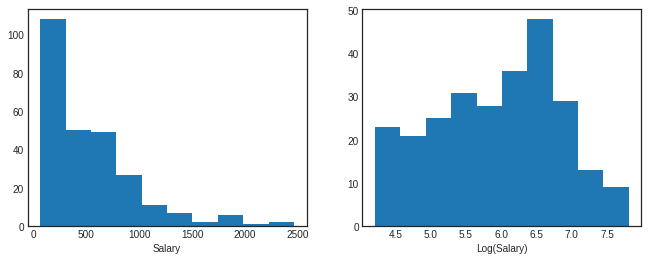

In [3]:
# Data => X, y
feature_names = ['Years', 'Hits']
X = df[feature_names].as_matrix()
y = np.log(df.Salary.as_matrix())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.as_matrix())
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

In [4]:
# Training
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

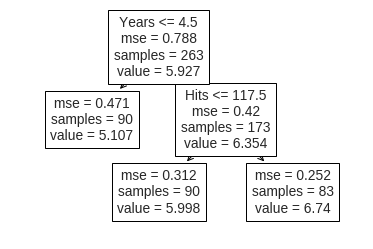

In [5]:
# Plot tree structure
res = plot_tree(regr, feature_names=feature_names)

---
###  Figure 8.2: The three-region partitions

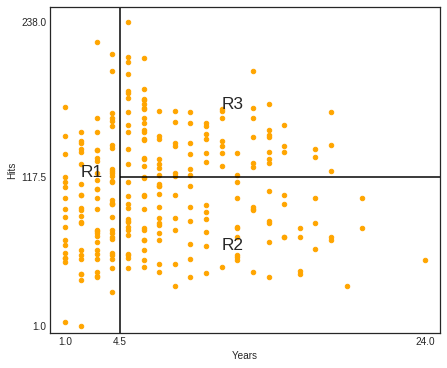

In [6]:
# Plot regions
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

---
### Pruning

In [7]:
# Data => X, y (Drop non-float columns)
X = df.drop(['Unnamed: 0', 'Salary'], axis=1)
y = df.Salary

In [8]:
# Change string data to numerical data
X.League = pd.factorize(X.League)[0]
X.Division = pd.factorize(X.Division)[0]
X.NewLeague = pd.factorize(X.NewLeague)[0]

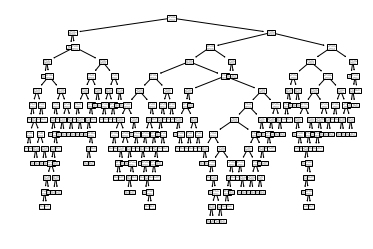

In [9]:
# Training (alpha == 5)
regr = DecisionTreeRegressor(ccp_alpha=5)
regr.fit(X, y)

res = plot_tree(regr)

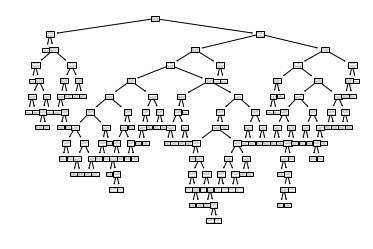

In [10]:
# Training (alpha == 50)
regr = DecisionTreeRegressor(ccp_alpha=50)
regr.fit(X, y)

res = plot_tree(regr)

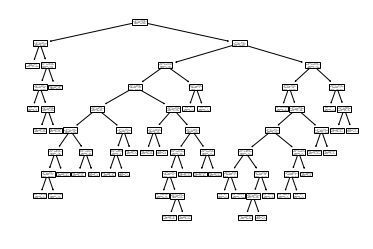

In [11]:
# Training (alpha == 500)
regr = DecisionTreeRegressor(ccp_alpha=500)
regr.fit(X, y)

res = plot_tree(regr)

---
### 8.1.2 Classification Trees

In [12]:
# Load data
df = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df.head(3)

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes

In [13]:
# Data => X, y
X = df.drop('AHD', axis=1)
y = pd.factorize(df.AHD)[0]

In [14]:
# Change string data to numerical data
X.ChestPain = pd.factorize(X.ChestPain)[0]
X.Thal = pd.factorize(X.Thal)[0]

In [15]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

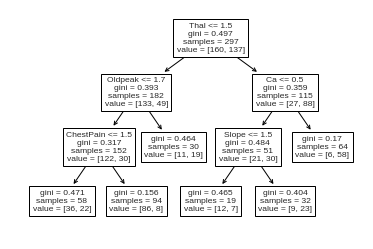

In [16]:
res = plot_tree(clf, feature_names=X.columns)

In [17]:
clf.score(X,y) # Mean accuracy

0.7878787878787878

---
## 8.3 Lab: Decision Trees

### 8.3.1 Fitting Classification Trees

In [18]:
# Load data
df = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)
df.head(3)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes

In [19]:
# Add High predictor
df['High'] = df.Sales.map(lambda x: 1 if x>8 else 0)
df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]

# Change string data to numerical data
df.Urban = df.Urban.map({'No':0, 'Yes':1})
df.US = df.US.map({'No':0, 'Yes':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null int64
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [20]:
df.head(3)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   

   Education  Urban  US  High  
0         17      1   1     1  
1         10      1   1     1  
2         12      1   1     1

In [21]:
# Data => X, y
X = df.drop(['Sales', 'High'], axis=1)
y = df.High

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [22]:
# Train & Test with all data (not training data)
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



In [23]:
# Train with Train data, Test with Test data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True        No  Yes
Predicted          
No         100   32
Yes         18   50

In [25]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       118
           1       0.74      0.61      0.67        82

    accuracy                           0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



---
### 8.3.2 Fitting Regression Trees

In [26]:
# Load data
df = pd.read_csv('Data/Boston.csv')
df.head(3)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

In [27]:
# Data => X, y
X = df.drop('medv', axis=1)
y = df.medv

# Split Train/Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [28]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Text(0, 0.5, 'y_test')

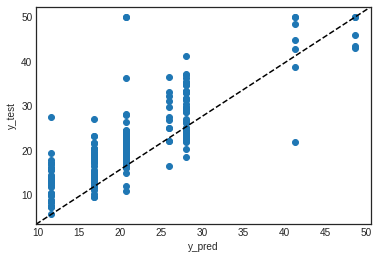

In [29]:
plt.scatter(y_pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [30]:
# Mean Square Error
mean_squared_error(y_test, y_pred)

26.023230850097445

---
### 8.3.3 Bagging and Random Forests

In [31]:
# There are 13 features in the dataset
X.shape

(506, 13)

In [32]:
# Using all features
regr_all = RandomForestRegressor(max_features=13, random_state=1)
# Using half features
regr_half = RandomForestRegressor(max_features=6, random_state=1)
# Using sqrt(p) features
regr_sqrt = RandomForestRegressor(max_features=4, random_state=1)

regr_all.fit(X_train, y_train)
regr_half.fit(X_train, y_train)
regr_sqrt.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

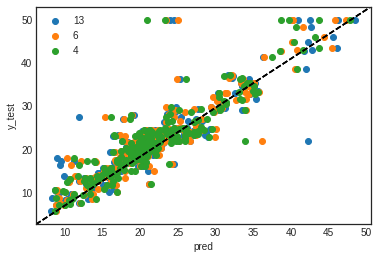

In [33]:
# Compare results
MSEs = []
for regr in [regr_all, regr_half, regr_sqrt]:
    y_pred = regr.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSEs.append(MSE)

    plt.scatter(y_pred, y_test, label=regr.max_features)
    plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
    plt.xlabel('pred')
    plt.ylabel('y_test')
plt.legend()

<BarContainer object of 3 artists>

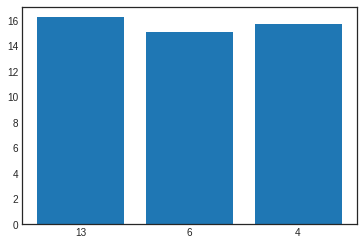

In [34]:
# Mean Square Errors
plt.bar(['13','6','4'], MSEs)

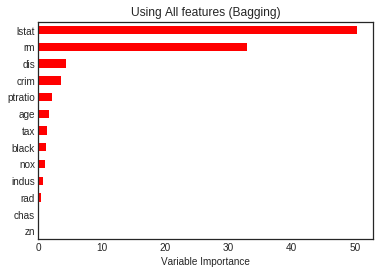

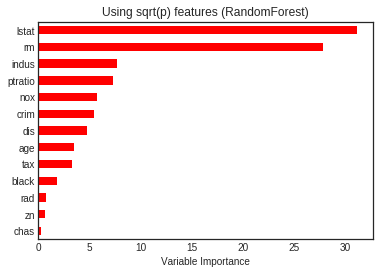

In [35]:
## Feature Importance
# Using all features
Importance = pd.DataFrame({'Importance':regr_all.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

plt.title('Using All features (Bagging)')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

# Using sqrt(p) features
Importance = pd.DataFrame({'Importance':regr_sqrt.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

plt.title('Using sqrt(p) features (RandomForest)')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

### 8.3.4 Boosting

In [36]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

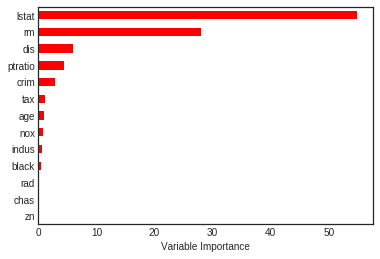

In [37]:
# Feature Importances
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### Effect of Tree number

In [38]:
# Make regressors with different number of trees (500, 1000, 1500, ..., 10000)
tree_nums = [x*100 for x in range(5, 105, 5)]
regrs = [GradientBoostingRegressor(n_estimators=tree_num, learning_rate=0.01, random_state=1)
         for tree_num in tree_nums]

In [39]:
# Get train/test errors
train_errors = []
test_errors = []
for regr in regrs:
    regr.fit(X_train, y_train)
    y_pred_with_train = regr.predict(X_train)
    y_pred_with_test = regr.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_pred_with_train)
    test_error = mean_squared_error(y_test, y_pred_with_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print(regr.n_estimators)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000


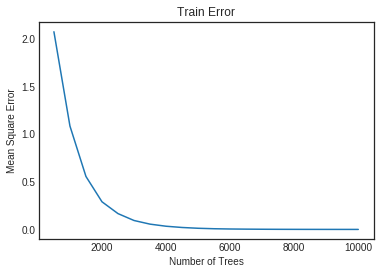

In [40]:
# Plot error graph
plt.title('Train Error')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Trees')
plt.plot(tree_nums, train_errors)

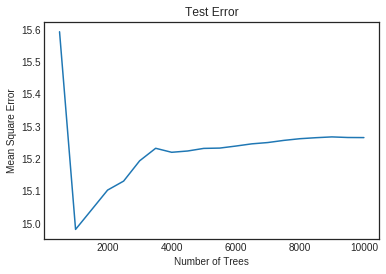

In [41]:
# Plot error graph
plt.title('Test Error')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Trees')
plt.plot(tree_nums, test_errors)